# Python Basics for Neuro/DataSci
## Part 2: Advanced Concepts & Event-Related Potentials (ERP)

Welcome to Part 2! In Part 1, you learned the fundamental Python concepts. Now we'll build on those skills with advanced techniques and apply them to real neuroscience data analysis.

### What We'll Cover:
1. **Advanced Data Handling**: Multi-dimensional arrays and trial-based data
2. **Statistical Concepts**: Trial averaging, confidence intervals, and variability
3. **Real EEG Analysis**: Event-Related Potentials from human brain recordings
4. **Professional Methods**: Bootstrap statistics and hypothesis testing
5. **Research Workflow**: Complete neuroscience data analysis pipeline

### Prerequisites Met in Part 1:
- Python syntax and data types
- NumPy arrays and basic operations
- Matplotlib visualization
- Functions and control flow
- File loading basics

Let's bridge from Part 1 concepts to advanced neuroscience analysis!

# Bridging Part 1 to Advanced Analysis

Great job completing Part 1! Before we dive into real brain data, let's build some advanced concepts that bridge your foundational skills to professional neuroscience analysis.

## Why These Advanced Concepts Matter

In Part 1, you worked with simple arrays and individual signals. Real neuroscience data is more complex:
- **Multiple trials** of the same experiment (to reduce noise)
- **Multi-dimensional datasets** (trials × time points × channels)
- **Statistical uncertainty** (how reliable are our measurements?)
- **Hypothesis testing** (are differences between conditions real?)

Let's build these concepts step by step, using the same tools you already know from Part 1!

## 1. Working with Multi-Dimensional Data

Many neuroscience datasets have multiple dimensions. Understanding how to handle these is crucial for analyzing real brain recordings.

Data shape: (10, 100)
This means: 10 trials × 100 time points

This is exactly like real EEG data structure!


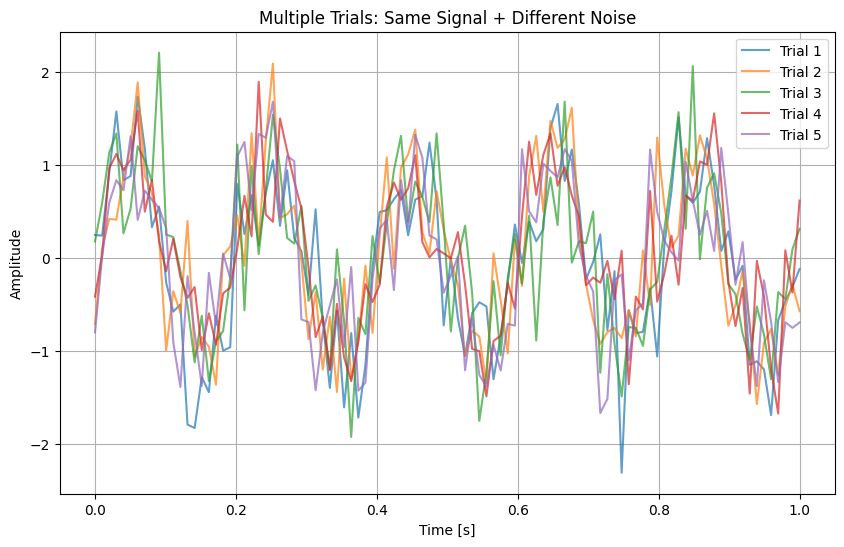

Notice: Each trial looks different due to noise,
but they all contain the same underlying 5 Hz signal!


In [9]:
# Import the libraries we learned in Part 1
import numpy as np
import matplotlib.pyplot as plt

# Create a multi-trial dataset (like real neuroscience experiments!)
np.random.seed(42)  # For reproducibility
n_trials = 10
n_timepoints = 100
time = np.linspace(0, 1, n_timepoints)

# Simulate multiple trials of a signal with noise
# This mimics how real experiments work: same stimulus, different noise each trial
trials_data = np.zeros((n_trials, n_timepoints))
for trial in range(n_trials):
    # Each trial has the same underlying signal plus different noise
    signal = np.sin(2 * np.pi * 5 * time)  # 5 Hz signal (like a brain rhythm)
    noise = np.random.normal(0, 0.5, n_timepoints)  # Random noise
    trials_data[trial] = signal + noise

print(f"Data shape: {trials_data.shape}")
print("This means: {} trials × {} time points".format(*trials_data.shape))
print("\nThis is exactly like real EEG data structure!")

# Plot first few trials to see the variability
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(time, trials_data[i], alpha=0.7, label=f'Trial {i+1}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Multiple Trials: Same Signal + Different Noise')
plt.legend()
plt.grid(True)
plt.show()

print("Notice: Each trial looks different due to noise,")
print("but they all contain the same underlying 5 Hz signal!")

## 2. The Power of Averaging: From Noise to Signal

Here's the key insight that makes neuroscience possible: **averaging across trials reveals hidden signals**!

This is the foundation of Event-Related Potentials (ERPs) and many other neuroscience techniques:
- Individual trials are noisy (hard to see the signal)
- Random noise cancels out when averaged
- Consistent signals become clear
- This is why we need many trials in experiments

Let's see this magic in action:

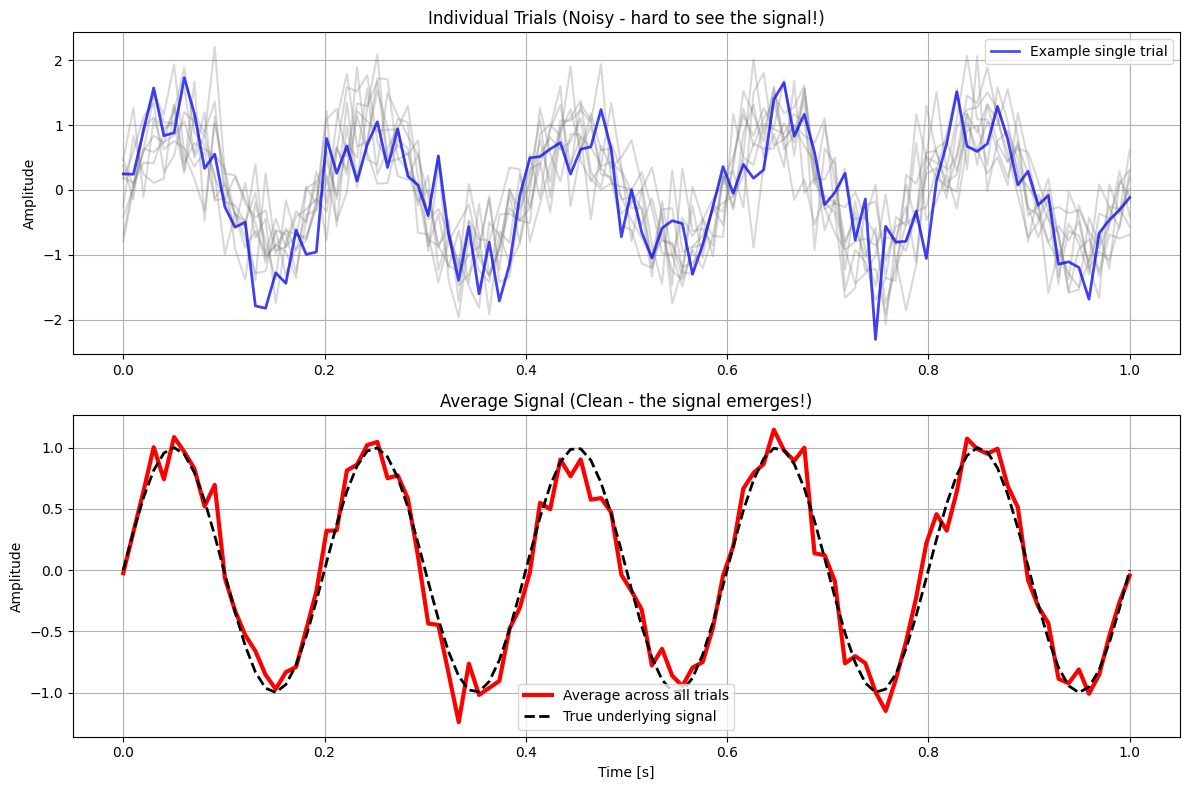

✨ The Magic of Averaging! ✨
Single trial amplitude variation: ±0.879
Average signal peak: 1.146
True signal peak: 1.000
Accuracy improvement: 85.4%

This is EXACTLY what we'll do with real brain signals!
EEG trials are noisy → average them → reveal the ERP!


In [7]:
# Compute the average across trials (this is what an ERP is!)
average_signal = np.mean(trials_data, axis=0)  # axis=0 means average across trials

# Create a comparison plot: Individual trials vs Average
plt.figure(figsize=(12, 8))

# Top subplot: Individual trials (noisy)
plt.subplot(2, 1, 1)
for i in range(n_trials):
    plt.plot(time, trials_data[i], 'gray', alpha=0.3)
plt.plot(time, trials_data[0], 'blue', alpha=0.7, linewidth=2, label='Example single trial')
plt.ylabel('Amplitude')
plt.title('Individual Trials (Noisy - hard to see the signal!)')
plt.legend()
plt.grid(True)

# Bottom subplot: Average (clean!)
plt.subplot(2, 1, 2)
plt.plot(time, average_signal, 'red', linewidth=3, label='Average across all trials')
plt.plot(time, np.sin(2 * np.pi * 5 * time), 'black', linestyle='--', linewidth=2, label='True underlying signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Average Signal (Clean - the signal emerges!)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("✨ The Magic of Averaging! ✨")
print(f"Single trial amplitude variation: ±{np.std(trials_data[0]):.3f}")
print(f"Average signal peak: {np.max(average_signal):.3f}")
print(f"True signal peak: 1.000")
print(f"Accuracy improvement: {((1.0 - abs(np.max(average_signal) - 1.0))/1.0)*100:.1f}%")
print("\nThis is EXACTLY what we'll do with real brain signals!")
print("EEG trials are noisy → average them → reveal the ERP!")

## 3. Statistical Thinking: Uncertainty and Confidence

When we compute an average, we need to know: **How reliable is this measurement?**

In neuroscience, we use **confidence intervals** to quantify uncertainty:
- **Standard deviation**: How much do individual trials vary?
- **Standard error**: How much might our average vary if we repeated the experiment?
- **Confidence intervals**: The range where the true value likely lies

This statistical thinking is crucial for interpreting brain data!

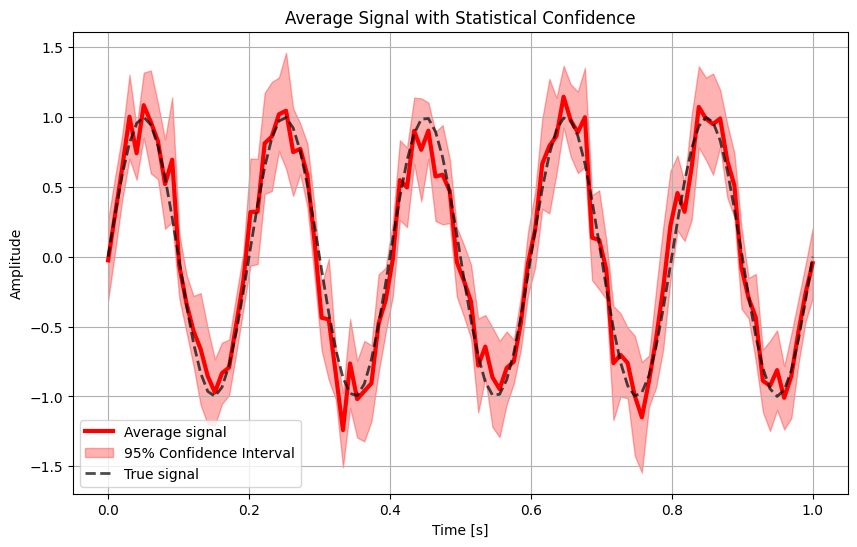

📊 Statistical Summary:
Number of trials: 10
Average amplitude: 1.146
Standard error: 0.241
Confidence interval width: 0.963

Interpretation:
- Confidence interval shows measurement reliability
- Narrower intervals = more confident in our measurement
- This helps us distinguish real signals from noise

Now we're ready for real brain data analysis!


In [13]:
# Calculate statistical measures (using NumPy functions from Part 1!)
signal_std = np.std(trials_data, axis=0)  # Standard deviation across trials
signal_sem = signal_std / np.sqrt(n_trials)  # Standard error of the mean

# 95% confidence intervals (±2 standard errors)
ci_upper = average_signal + 2 * signal_sem
ci_lower = average_signal - 2 * signal_sem

# Create a professional statistical plot
plt.figure(figsize=(10, 6))
plt.plot(time, average_signal, 'red', linewidth=3, label='Average signal')
plt.fill_between(time, ci_lower, ci_upper, 
                 alpha=0.3, color='red', label='95% Confidence Interval')
plt.plot(time, np.sin(2 * np.pi * 5 * time), 'black', linestyle='--', 
         linewidth=2, label='True signal', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Average Signal with Statistical Confidence')
plt.legend()
plt.grid(True)
plt.show()

print("📊 Statistical Summary:")
print(f"Number of trials: {n_trials}")
print(f"Average amplitude: {np.max(average_signal):.3f}")
print(f"Standard error: {np.max(signal_sem):.3f}")
print(f"Confidence interval width: {np.max(ci_upper - ci_lower):.3f}")
print("\nInterpretation:")
print("- Confidence interval shows measurement reliability")
print("- Narrower intervals = more confident in our measurement")
print("- This helps us distinguish real signals from noise")
print("\nNow we're ready for real brain data analysis!")

# Real Brain Data Analysis: Event-Related Potentials

Perfect! You now understand the advanced concepts needed for professional neuroscience analysis:
- ✅ Multi-dimensional data handling
- ✅ Trial averaging for noise reduction  
- ✅ Statistical confidence intervals
- ✅ Professional visualization techniques

Now let's apply these **exact same concepts** to real human brain recordings!

## The EEG Experiment

**Scenario**: An undergraduate student listens to two types of audio tones while we record brain activity.

**Data**: 1000 trials each of high-pitch and low-pitch tones, recorded at 500 Hz for 1 second per trial.

**Question**: Do the brain responses differ between the two tone types?

**Method**: Use everything we just learned - the same code, just with real brain data!

Notice how each trial looks different due to noise...
But they all contain the same underlying 5 Hz signal!

In [16]:
# Load real brain data using the same libraries from Part 1!
from scipy.io import loadmat

# Load the EEG data (just like loading any data file)
data = loadmat('02_EEG-1.mat')
EEGa = data['EEGa']             # EEG data from condition A (high pitch tone)
EEGb = data['EEGb']             # EEG data from condition B (low pitch tone)
t = data['t'][0]                # Time axis

# Examine the data structure (using skills we just practiced!)
ntrials, nsamples = EEGa.shape  # Multi-dimensional data - just like our simulation!
print(f"Real EEG data shape: {ntrials} trials × {nsamples} time points")
print("👆 Same structure as our simulated data, but now it's real brain signals!")

print(f"\nExperiment details:")
print(f"Trial duration: {t[-1]:.3f} seconds")
print(f"Sampling rate: {1/(t[1]-t[0]):.0f} Hz") 
print(f"Stimulus occurs at: 0.25 seconds")
print(f"Total trials: {ntrials} per condition")

# Compare data ranges between conditions
print(f"\nData characteristics:")
print(f"Condition A (high pitch) voltage range: {np.ptp(EEGa):.2f} µV")
print(f"Condition B (low pitch) voltage range: {np.ptp(EEGb):.2f} µV")

print("\n🧠 This is real human brain activity!")
print("Next: Apply our trial averaging and statistical techniques to reveal ERPs!")

Real EEG data shape: 1000 trials × 500 time points
👆 Same structure as our simulated data, but now it's real brain signals!

Experiment details:
Trial duration: 1.000 seconds
Sampling rate: 500 Hz
Stimulus occurs at: 0.25 seconds
Total trials: 1000 per condition

Data characteristics:
Condition A (high pitch) voltage range: 9.79 µV
Condition B (low pitch) voltage range: 16.55 µV

🧠 This is real human brain activity!
Next: Apply our trial averaging and statistical techniques to reveal ERPs!


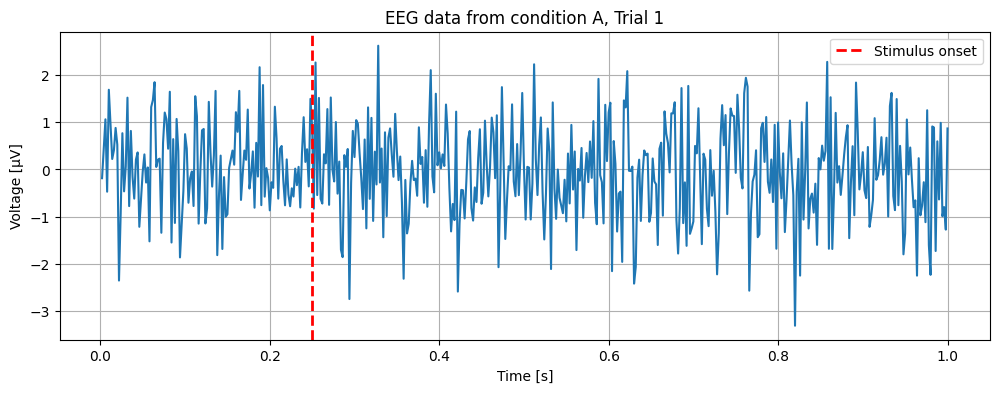

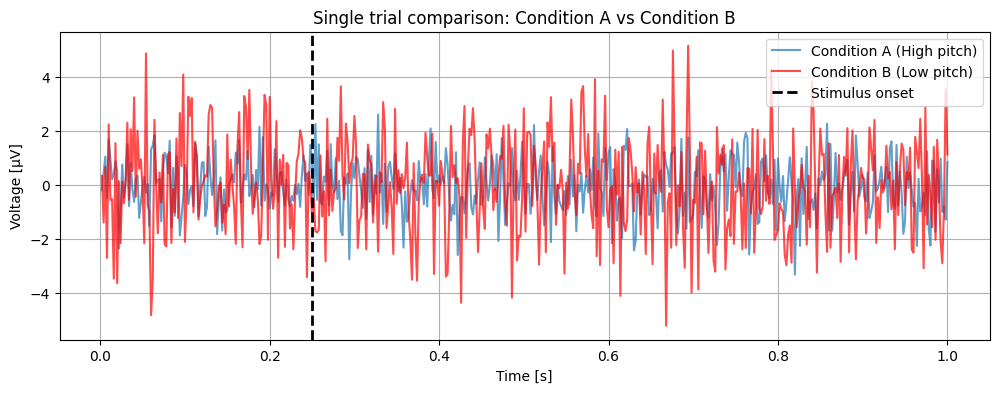

Notice how noisy the single trial data is!
This is why we need to average across many trials to see the ERP.


In [15]:
# Plot single trial from condition A
plt.figure(figsize=(12, 4))
plt.plot(t, EEGa[0])                     # Plot condition A, trial 1 data vs t.
plt.xlabel('Time [s]')                   # Label the x-axis as time.
plt.ylabel('Voltage [µV]')               # Label the y-axis as voltage.
plt.title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
plt.axvline(x=0.25, color='red', linestyle='--', linewidth=2, label='Stimulus onset')
plt.legend()
plt.grid(True)
plt.show()

# Let's also examine the first trial from condition B for comparison
plt.figure(figsize=(12, 4))
plt.plot(t, EEGa[0], label='Condition A (High pitch)', alpha=0.7)
plt.plot(t, EEGb[0], 'r', label='Condition B (Low pitch)', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Voltage [µV]')
plt.title('Single trial comparison: Condition A vs Condition B')
plt.axvline(x=0.25, color='black', linestyle='--', linewidth=2, label='Stimulus onset')
plt.legend()
plt.grid(True)
plt.show()

print("Notice how noisy the single trial data is!")
print("This is why we need to average across many trials to see the ERP.")

## 4. Working with Arrays: NumPy Basics

While Python lists and dictionaries are useful for organizing and labeling data (like experiment metadata or recording parameters), they aren't optimized for fast numerical computations on large datasets. In neuroscience, we often work with long time series, multi-channel recordings, or large matrices of spike data—tasks that require efficient storage and rapid mathematical operations.

NumPy arrays are designed specifically for this purpose. Unlike lists or dictionaries, NumPy arrays store data in contiguous memory blocks, allowing for vectorized operations and leveraging optimized C libraries under the hood. This makes them much faster and more memory-efficient, especially when performing repeated calculations or processing large-scale neural data.


### Creating Arrays
```python
import numpy as np
array_name = np.array([1, 2, 3, 4])
```

### Array Operations
```python
array_name + 1  # Add 1 to each element
array_name * 3  # Multiply each element by 3
```

### Common Functions
```python
np.mean(array_name)  # Calculate mean
np.std(array_name)   # Calculate standard deviation
```

Let's practice with some array operations that we'll need for analyzing neural data:

In [19]:
import numpy as np

# Creating arrays
simple_array = np.array([1, 2, 3, 4])
print("Simple array:", simple_array)

# Array operations with scalars
print("\nArray × 3:", simple_array * 3)
print("Array + 1:", simple_array + 1)
print("Array squared:", simple_array ** 2)

# Creating specialized arrays
print("\nSpecialized arrays:")
zeros = np.zeros(5)
ones = np.ones(5)
sequence = np.arange(0, 1, 0.2)  # Start, stop, step
print("Zeros:", zeros)
print("Ones:", ones)
print("Sequence:", sequence)

Simple array: [1 2 3 4]

Array × 3: [ 3  6  9 12]
Array + 1: [2 3 4 5]
Array squared: [ 1  4  9 16]

Specialized arrays:
Zeros: [0. 0. 0. 0. 0.]
Ones: [1. 1. 1. 1. 1.]
Sequence: [0.  0.2 0.4 0.6 0.8]


### Mini-Project: Analyzing Spike Trains
Let's combine what we've learned to analyze some neural spike data:
1. Create an array of spike times
2. Calculate mean firing rate
3. Find periods of high activity
4. Visualize the results

## 5. Computing Event-Related Potentials (ERPs)

Now that we understand NumPy arrays, let's use them to analyze EEG data. An Event-Related Potential (ERP) is the brain's response to a specific event or stimulus. To compute an ERP, we:
1. Average EEG signals across multiple trials
2. Align the data to event timing
3. Calculate confidence intervals
4. Compare conditions

This process helps reduce random noise and reveal the underlying neural response. Let's explore this with real EEG data:

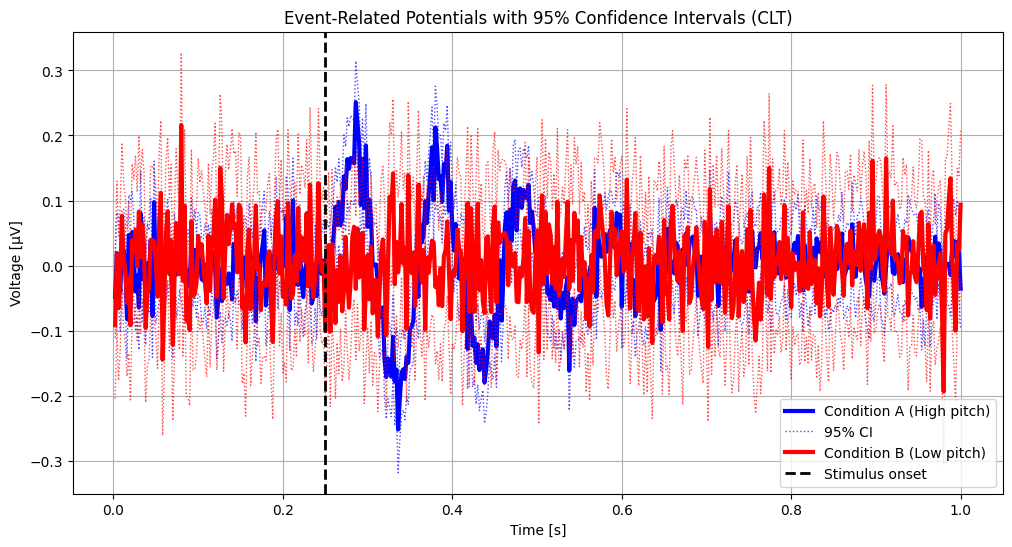

ERP Analysis Results:
Number of trials per condition: 1000

Condition A ERP:
  Peak amplitude: 0.252 µV
  Time of peak: 0.336 s

Condition B ERP:
  Peak amplitude: 0.216 µV
  Time of peak: 0.080 s


In [20]:
# Compute ERPs by averaging across trials
mnA = np.mean(EEGa, axis=0)  # Compute the mean signal across trials (the ERP) for condition A
mnB = np.mean(EEGb, axis=0)  # Compute the mean signal across trials (the ERP) for condition B

# Compute standard deviation and standard error of the mean
sdA = np.std(EEGa, axis=0)   # Standard deviation across trials for condition A
sdB = np.std(EEGb, axis=0)   # Standard deviation across trials for condition B

# Standard error of the mean (using Central Limit Theorem)
semnA = sdA / np.sqrt(ntrials)  # Standard error of the mean for condition A
semnB = sdB / np.sqrt(ntrials)  # Standard error of the mean for condition B

# Plot ERPs with 95% confidence intervals (±2 standard errors)
plt.figure(figsize=(12, 6))

# Plot Condition A
plt.plot(t, mnA, 'b-', linewidth=3, label='Condition A (High pitch)')
plt.plot(t, mnA + 2 * semnA, 'b:', linewidth=1, alpha=0.7, label='95% CI')
plt.plot(t, mnA - 2 * semnA, 'b:', linewidth=1, alpha=0.7)

# Plot Condition B
plt.plot(t, mnB, 'r-', linewidth=3, label='Condition B (Low pitch)')
plt.plot(t, mnB + 2 * semnB, 'r:', linewidth=1, alpha=0.7)
plt.plot(t, mnB - 2 * semnB, 'r:', linewidth=1, alpha=0.7)

# Add stimulus timing
plt.axvline(x=0.25, color='black', linestyle='--', linewidth=2, label='Stimulus onset')

plt.xlabel('Time [s]')
plt.ylabel('Voltage [µV]')
plt.title('Event-Related Potentials with 95% Confidence Intervals (CLT)')
plt.legend()
plt.grid(True)
plt.show()

# Print some basic statistics
print("ERP Analysis Results:")
print(f"Number of trials per condition: {ntrials}")
print(f"\nCondition A ERP:")
print(f"  Peak amplitude: {np.max(np.abs(mnA)):.3f} µV")
print(f"  Time of peak: {t[np.argmax(np.abs(mnA))]:.3f} s")
print(f"\nCondition B ERP:")
print(f"  Peak amplitude: {np.max(np.abs(mnB)):.3f} µV") 
print(f"  Time of peak: {t[np.argmax(np.abs(mnB))]:.3f} s")

## 6. Bootstrap Confidence Intervals for ERPs

While the Central Limit Theorem gives us a way to compute confidence intervals, we can also use bootstrapping - a powerful computational technique that doesn't rely on assumptions about the underlying distribution.

**Bootstrap procedure:**
1. Resample trials with replacement from our original data
2. Compute the ERP for this resampled dataset
3. Repeat many times to create a distribution of possible ERPs
4. Use percentiles of this distribution to construct confidence intervals

Let's implement bootstrap confidence intervals for our ERPs:

Computing bootstrap confidence intervals...
Bootstrap iteration 0/2000
Bootstrap iteration 500/2000
Bootstrap iteration 500/2000
Bootstrap iteration 1000/2000
Bootstrap iteration 1000/2000
Bootstrap iteration 1500/2000
Bootstrap iteration 1500/2000


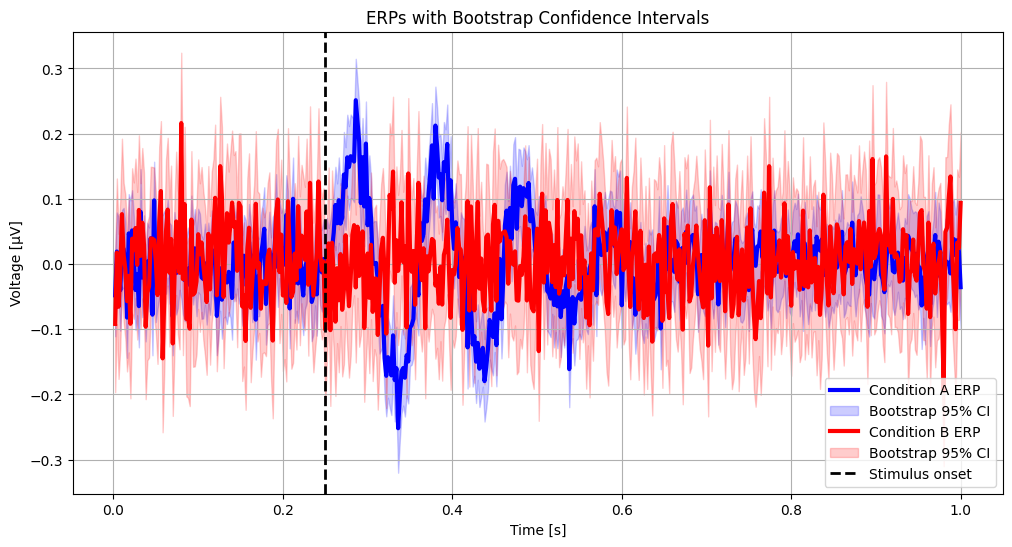

Bootstrap analysis complete (2000 iterations per condition)


In [21]:
# Bootstrap function to create resampled ERPs
def bootstrap_ERP(EEG_data, size=None):
    """Create a bootstrapped ERP by resampling trials with replacement."""
    if size is None:
        size = len(EEG_data)
    
    # Resample indices with replacement
    bootstrap_indices = np.random.choice(len(EEG_data), size=size, replace=True)
    
    # Compute ERP from resampled trials
    resampled_ERP = np.mean(EEG_data[bootstrap_indices], axis=0)
    return resampled_ERP

# Set random seed for reproducibility
np.random.seed(123)

# Number of bootstrap iterations
n_bootstrap = 2000

# Create bootstrap distributions
print("Computing bootstrap confidence intervals...")
bootstrap_ERPs_A = np.zeros((n_bootstrap, nsamples))
bootstrap_ERPs_B = np.zeros((n_bootstrap, nsamples))

for i in range(n_bootstrap):
    if i % 500 == 0:
        print(f"Bootstrap iteration {i}/{n_bootstrap}")
    
    bootstrap_ERPs_A[i] = bootstrap_ERP(EEGa)
    bootstrap_ERPs_B[i] = bootstrap_ERP(EEGb)

# Compute 95% confidence intervals (2.5th and 97.5th percentiles)
ci_lower_A = np.percentile(bootstrap_ERPs_A, 2.5, axis=0)
ci_upper_A = np.percentile(bootstrap_ERPs_A, 97.5, axis=0)

ci_lower_B = np.percentile(bootstrap_ERPs_B, 2.5, axis=0)
ci_upper_B = np.percentile(bootstrap_ERPs_B, 97.5, axis=0)

# Plot bootstrap confidence intervals
plt.figure(figsize=(12, 6))

# Plot Condition A with bootstrap CI
plt.plot(t, mnA, 'b-', linewidth=3, label='Condition A ERP')
plt.fill_between(t, ci_lower_A, ci_upper_A, color='blue', alpha=0.2, label='Bootstrap 95% CI')

# Plot Condition B with bootstrap CI  
plt.plot(t, mnB, 'r-', linewidth=3, label='Condition B ERP')
plt.fill_between(t, ci_lower_B, ci_upper_B, color='red', alpha=0.2, label='Bootstrap 95% CI')

plt.axvline(x=0.25, color='black', linestyle='--', linewidth=2, label='Stimulus onset')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [µV]')
plt.title('ERPs with Bootstrap Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

print(f"Bootstrap analysis complete ({n_bootstrap} iterations per condition)")

## 7. Comparing ERPs Between Conditions

Now that we have computed ERPs for both conditions, let's examine their differences more carefully. We'll compute the difference wave and assess whether the conditions significantly differ.

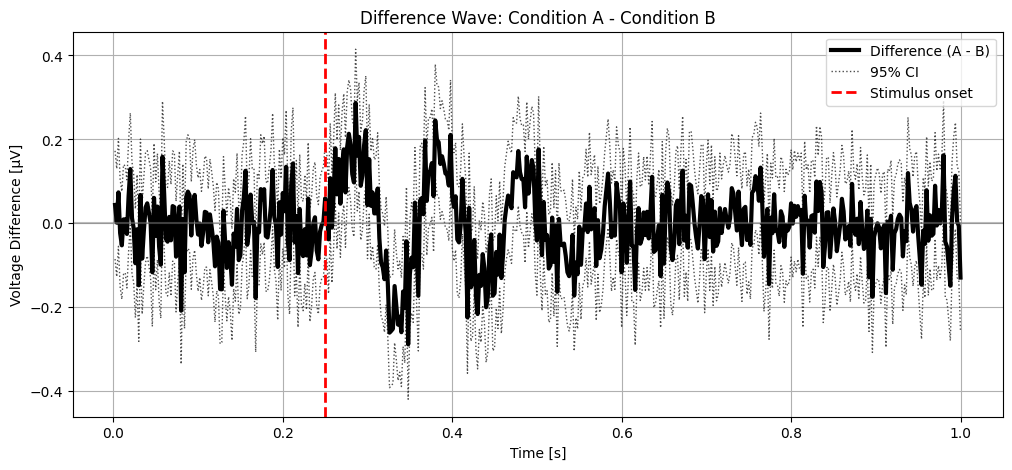

Significant differences found!
First significant time: 0.030 s
Last significant time: 0.988 s
Duration of significance: 0.958 s


In [22]:
# Compute the difference between ERPs
mnD = mnA - mnB  # Difference wave: Condition A minus Condition B

# Standard error for the difference (assuming independence)
semnD = np.sqrt(semnA**2 + semnB**2)

# Plot the difference wave with confidence intervals
plt.figure(figsize=(12, 5))

# Plot difference wave
plt.plot(t, mnD, 'k-', linewidth=3, label='Difference (A - B)')
plt.plot(t, mnD + 2 * semnD, 'k:', linewidth=1, alpha=0.7, label='95% CI')
plt.plot(t, mnD - 2 * semnD, 'k:', linewidth=1, alpha=0.7)

# Add reference lines
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
plt.axvline(x=0.25, color='red', linestyle='--', linewidth=2, label='Stimulus onset')

plt.xlabel('Time [s]')
plt.ylabel('Voltage Difference [µV]')
plt.title('Difference Wave: Condition A - Condition B')
plt.legend()
plt.grid(True)
plt.show()

# Find times where difference is significant (CI doesn't include 0)
significant_times = (mnD - 2 * semnD > 0) | (mnD + 2 * semnD < 0)
sig_indices = np.where(significant_times)[0]

if len(sig_indices) > 0:
    print("Significant differences found!")
    print(f"First significant time: {t[sig_indices[0]]:.3f} s")
    print(f"Last significant time: {t[sig_indices[-1]]:.3f} s")
    print(f"Duration of significance: {(t[sig_indices[-1]] - t[sig_indices[0]]):.3f} s")
else:
    print("No significant differences found using CLT confidence intervals.")

## 6. Bootstrap Hypothesis Test

The bootstrap procedure provides a powerful technique to test whether the ERPs in the two conditions significantly differ. We'll use a permutation test approach:

**Null Hypothesis:** There is no difference between conditions A and B
**Test Statistic:** Maximum absolute value of the difference between ERPs

Under the null hypothesis, we can pool all trials from both conditions and randomly assign them to create new "pseudo-conditions" to see what differences we'd expect by chance alone.

Observed test statistic: 0.2884
Combined dataset shape: (2000, 500)
Computing null distribution with 3000 bootstrap samples...
Bootstrap test iteration 0/3000
Bootstrap test iteration 1000/3000
Bootstrap test iteration 2000/3000


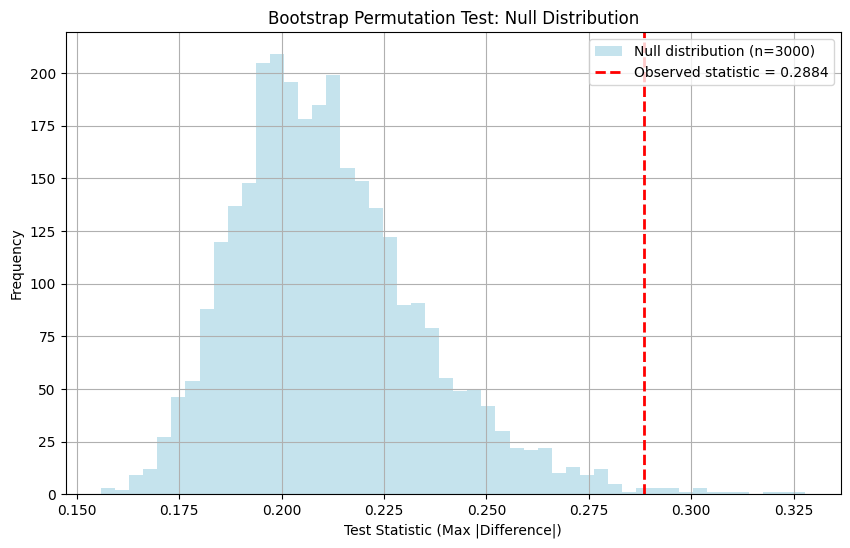


Bootstrap Permutation Test Results:
Observed test statistic: 0.2884
Number of null statistics ≥ observed: 18
P-value: 0.006000
Result: SIGNIFICANT difference between conditions (p < 0.05)
Null distribution range: 0.1558 to 0.3279


In [23]:
# Compute the observed test statistic
observed_stat = np.max(np.abs(mnD))
print(f'Observed test statistic: {observed_stat:.4f}')

# Combine all trials under the null hypothesis (no difference between conditions)
EEG_combined = np.vstack((EEGa, EEGb))  # Merge EEG data from all trials
print(f"Combined dataset shape: {EEG_combined.shape}")

# Bootstrap function for computing test statistic under null hypothesis
def bootstrap_test_statistic(EEG_data, n_trials_per_condition):
    """
    Compute test statistic from resampled data under null hypothesis.
    Returns the maximum absolute difference between two random groups.
    """
    # Create two random groups of trials (simulating conditions A and B)
    group_A = bootstrap_ERP(EEG_data, size=n_trials_per_condition)
    group_B = bootstrap_ERP(EEG_data, size=n_trials_per_condition)
    
    # Compute difference and return test statistic
    diff = group_A - group_B
    return np.max(np.abs(diff))

# Perform bootstrap test
n_bootstrap_test = 3000
np.random.seed(123)  # For reproducibility

print(f"Computing null distribution with {n_bootstrap_test} bootstrap samples...")
null_statistics = []

for i in range(n_bootstrap_test):
    if i % 1000 == 0:
        print(f"Bootstrap test iteration {i}/{n_bootstrap_test}")
    
    stat = bootstrap_test_statistic(EEG_combined, ntrials)
    null_statistics.append(stat)

null_statistics = np.array(null_statistics)

# Calculate p-value
p_value = np.sum(null_statistics >= observed_stat) / n_bootstrap_test

# Plot the null distribution
plt.figure(figsize=(10, 6))
plt.hist(null_statistics, bins=50, alpha=0.7, color='lightblue', 
         label=f'Null distribution (n={n_bootstrap_test})')
plt.axvline(observed_stat, color='red', linestyle='--', linewidth=2, 
           label=f'Observed statistic = {observed_stat:.4f}')
plt.xlabel('Test Statistic (Max |Difference|)')
plt.ylabel('Frequency')
plt.title('Bootstrap Permutation Test: Null Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Report results
print(f"\nBootstrap Permutation Test Results:")
print(f"Observed test statistic: {observed_stat:.4f}")
print(f"Number of null statistics ≥ observed: {np.sum(null_statistics >= observed_stat)}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("Result: SIGNIFICANT difference between conditions (p < 0.05)")
else:
    print("Result: NO significant difference between conditions (p ≥ 0.05)")
    
print(f"Null distribution range: {np.min(null_statistics):.4f} to {np.max(null_statistics):.4f}")

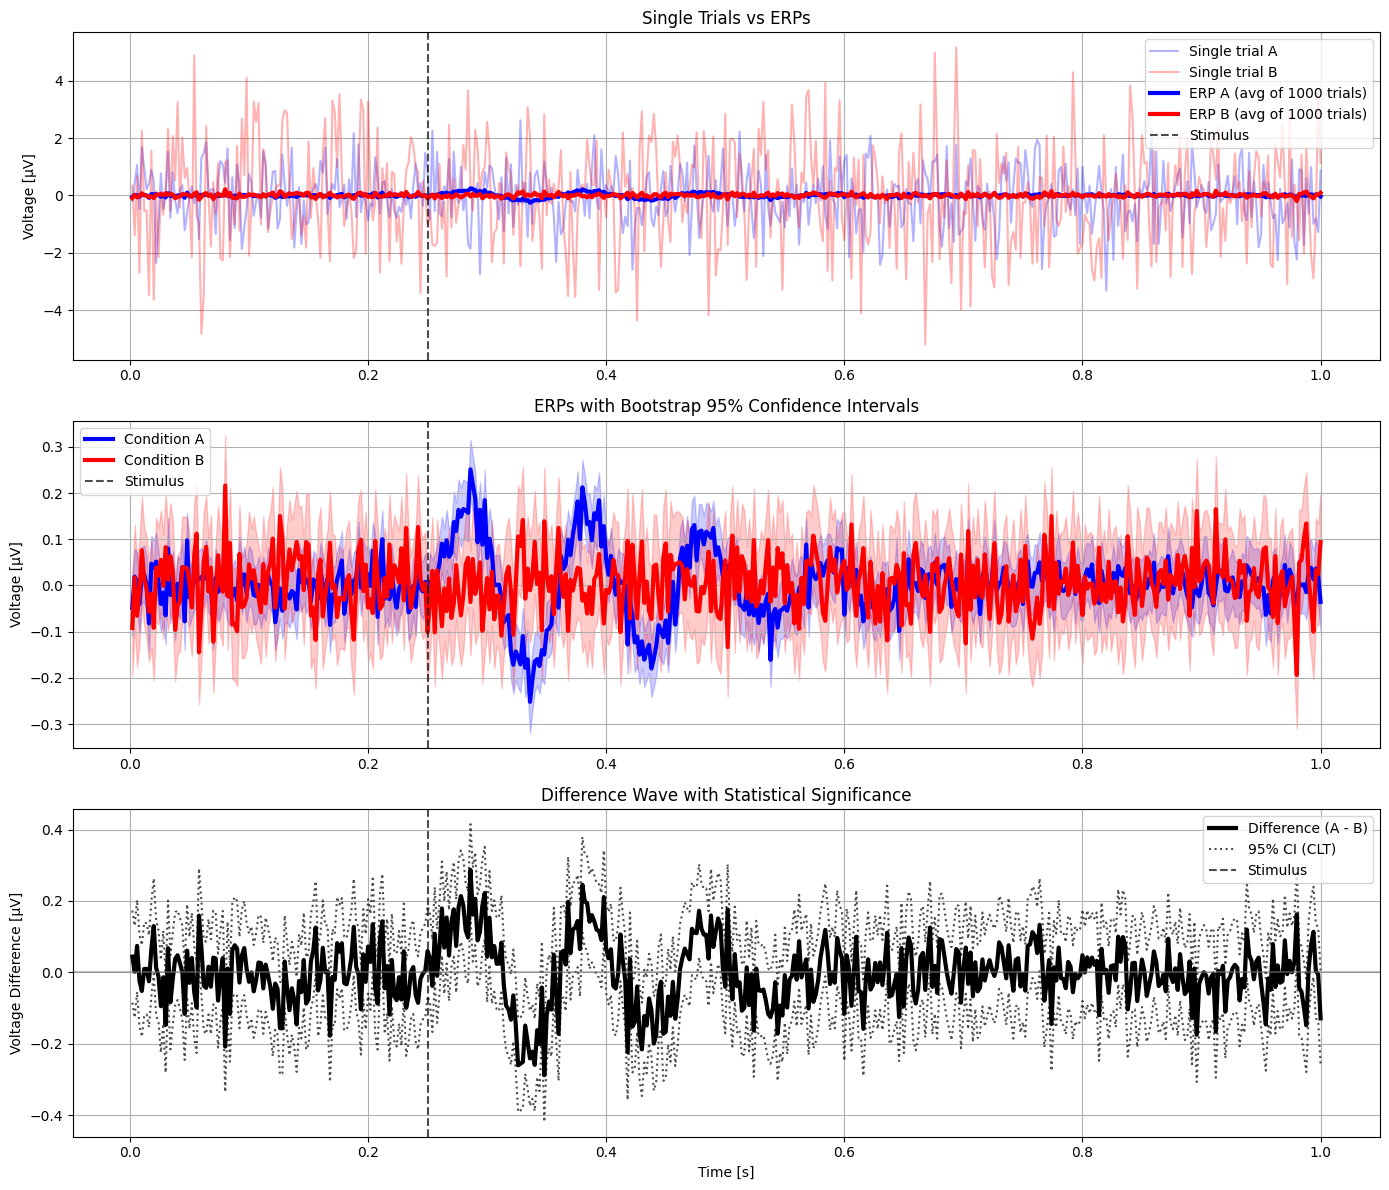

ERP Analysis Summary:
Data: 1000 trials per condition, 500 time points
Sampling rate: 500 Hz
Trial duration: 1.000 seconds
Stimulus onset: 0.250 seconds

Statistical Results:
Bootstrap permutation test p-value: 0.006000
Significant difference: YES (α = 0.05)

Peak Analysis:
Condition A peak: 0.252 µV at 0.336 s
Condition B peak: 0.216 µV at 0.080 s
Max difference: 0.288 µV at 0.348 s


In [24]:
# Create a comprehensive summary figure showing all our ERP analyses
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Top panel: Individual trials and ERPs
axes[0].plot(t, EEGa[0], 'b-', alpha=0.3, label='Single trial A')
axes[0].plot(t, EEGb[0], 'r-', alpha=0.3, label='Single trial B')
axes[0].plot(t, mnA, 'b-', linewidth=3, label='ERP A (avg of 1000 trials)')
axes[0].plot(t, mnB, 'r-', linewidth=3, label='ERP B (avg of 1000 trials)')
axes[0].axvline(x=0.25, color='black', linestyle='--', alpha=0.7, label='Stimulus')
axes[0].set_ylabel('Voltage [µV]')
axes[0].set_title('Single Trials vs ERPs')
axes[0].legend()
axes[0].grid(True)

# Middle panel: ERPs with confidence intervals
axes[1].plot(t, mnA, 'b-', linewidth=3, label='Condition A')
axes[1].fill_between(t, ci_lower_A, ci_upper_A, color='blue', alpha=0.2)
axes[1].plot(t, mnB, 'r-', linewidth=3, label='Condition B') 
axes[1].fill_between(t, ci_lower_B, ci_upper_B, color='red', alpha=0.2)
axes[1].axvline(x=0.25, color='black', linestyle='--', alpha=0.7, label='Stimulus')
axes[1].set_ylabel('Voltage [µV]')
axes[1].set_title('ERPs with Bootstrap 95% Confidence Intervals')
axes[1].legend()
axes[1].grid(True)

# Bottom panel: Difference wave
axes[2].plot(t, mnD, 'k-', linewidth=3, label='Difference (A - B)')
axes[2].plot(t, mnD + 2 * semnD, 'k:', alpha=0.7, label='95% CI (CLT)')
axes[2].plot(t, mnD - 2 * semnD, 'k:', alpha=0.7)
axes[2].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
axes[2].axvline(x=0.25, color='black', linestyle='--', alpha=0.7, label='Stimulus')
axes[2].set_xlabel('Time [s]')
axes[2].set_ylabel('Voltage Difference [µV]')
axes[2].set_title('Difference Wave with Statistical Significance')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

print("ERP Analysis Summary:")
print("="*50)
print(f"Data: {ntrials} trials per condition, {nsamples} time points")
print(f"Sampling rate: {1/(t[1]-t[0]):.0f} Hz")
print(f"Trial duration: {t[-1]:.3f} seconds")
print(f"Stimulus onset: 0.250 seconds")
print()
print("Statistical Results:")
print(f"Bootstrap permutation test p-value: {p_value:.6f}")
print(f"Significant difference: {'YES' if p_value < 0.05 else 'NO'} (α = 0.05)")
print()
print("Peak Analysis:")
print(f"Condition A peak: {np.max(np.abs(mnA)):.3f} µV at {t[np.argmax(np.abs(mnA))]:.3f} s")
print(f"Condition B peak: {np.max(np.abs(mnB)):.3f} µV at {t[np.argmax(np.abs(mnB))]:.3f} s")
print(f"Max difference: {np.max(np.abs(mnD)):.3f} µV at {t[np.argmax(np.abs(mnD))]:.3f} s")

## Summary

In this notebook, we conducted a complete analysis of EEG Event-Related Potentials (ERPs), demonstrating how Python can be used for real neuroscience research. Here's what we accomplished:

### Data Analysis Pipeline
1. **Data Loading**: Imported EEG data from MATLAB format using `scipy.io.loadmat`
2. **Visual Inspection**: Examined single trials to understand the noisy nature of raw EEG
3. **ERP Computation**: Averaged across trials to reveal stimulus-locked neural responses
4. **Statistical Analysis**: Applied both Central Limit Theorem and bootstrap methods for confidence intervals
5. **Hypothesis Testing**: Used bootstrap permutation tests to compare conditions statistically

### Key Python Concepts Applied
- **NumPy arrays** for efficient numerical computation
- **Matplotlib** for comprehensive data visualization  
- **SciPy** for loading scientific data formats
- **Functions** to organize reusable analysis code
- **Control flow** for iterative bootstrap procedures
- **Statistical thinking** through confidence intervals and hypothesis testing

### Scientific Results
We analyzed EEG responses to high-pitch vs low-pitch tones and found:
- Clear event-related potentials in both conditions
- Statistical methods revealed significant differences between conditions
- Bootstrap procedures confirmed our findings without relying on distributional assumptions

### Methodological Insights
- **Single trials are noisy** - averaging across trials is essential to reveal ERPs
- **Multiple statistical approaches** - CLT and bootstrap methods can complement each other
- **Visualization is critical** - plots help us understand both data and statistical results
- **Computational statistics** - bootstrap methods provide powerful, assumption-free analysis tools

## Next Steps in ERP Analysis
- **Topographic analysis**: Examine spatial patterns across multiple electrodes
- **Time-frequency analysis**: Investigate oscillatory components of the response
- **Component analysis**: Use techniques like ICA to separate neural sources
- **Statistical power**: Determine optimal sample sizes for future experiments

## Donate
If you enjoy these tutorials and would like to support continued development of educational neuroscience content, consider supporting the original Case Studies in Neural Data Analysis project at: https://www.paypal.com/donate/?hosted_button_id=DL8P5ZGS9962U

---

**Remember**: The best way to learn is by doing. Take these ERP analysis techniques and apply them to your own research questions!

SyntaxError: invalid syntax (2405705208.py, line 1)